# Training loss viewer

In [75]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.ticker import FormatStrFormatter
import glob
import time

plt.rcParams.update({'font.size': 16, 'lines.markersize' : 20})

### For old directory setup (31D)

In [76]:
# Use for old directory setup
loss_path = r'F:\Master\Data\storage\collective-losses'
info_path = r'F:\Master\Data\storage\model-info'

run_nrs = [20211025092823, 20211024224616, 20211024224522, 20211024224338, 20211024192654] # 31-dim models
#run_nrs = [35, 36, 37] # 300-300-300
#run_nrs = [34] # Older architecture, 200-200-100 or 200-200-200?

full_names = []
for run_nr in run_nrs:
    this_path = os.sep.join([info_path, 'run_'+str(run_nr)+'*'])
    full_names += glob.glob(this_path)
model_names = []
for model_name in full_names:
    model_names.append(model_name[model_name.rfind('run'):model_name.rfind('.info')])
print('Number of models:', len(model_names))

Number of models: 60


In [77]:
# Use for old directory setup
losses = {}
info = {}
architecture = {}

t = time.perf_counter()
for i, model_name in enumerate(model_names):
    losses[model_name] = pd.read_pickle(os.sep.join([loss_path, model_name+'_losses']))
    full_info = pd.read_pickle(os.sep.join([info_path, model_name+'.info']))
    info[model_name] = full_info[0]
    try:
        architecture[model_name] = full_info[2]
    except:
        print('Architecture not available for model', model_name)
print('Total run time:', time.perf_counter() - t, 'seconds.')
print('Architecture of first model:', list(architecture.items())[0])

Total run time: 1.789102899999989 seconds.
Architecture of first model: ('run_20211025092823_pt_sort_4_48', '124-300-300-300-48-300-300-300-124, activation function: Tanh()')


### Alternatively, for new, run-specific directory setup (4D)

In [64]:
# Use for new, run-specific directory setup
storage_path = r'F:\Master\Data\storage'

#run_nrs = [20211101114815, 20211101124718, 20211104113505, 20211028201105, 20211028150801, 20211028150722, 20211028150713, 20211109204941, 20211109204942] # all intermediate
run_nrs = [20211101175646, 20211101175647, 20211101175649, 20211101175648, 20211102035713, 20211101175700, 20211108161124, 20211101181052, 20211101175702, 20211101175701, 20211101175706, 20211101175705, 20211101175703, 20211101175709] # all non-intermediate models except 4_9 which is in 20211101175704
#run_nrs = [20211028201105, 20211028150801, 20211028150722, 20211028150713] # ?

loss_path = {}
info_path = {}
for run_nr in run_nrs:
    folder = glob.glob(os.sep.join([storage_path, 'run_'+str(run_nr)+'*']))[0]
    loss_path[run_nr] = os.sep.join([folder, 'collective-losses'])
    info_path[run_nr] = os.sep.join([folder, 'model-info'])

full_names = {}
model_names_dict = {}
for run_nr in run_nrs:
    this_path = os.sep.join([info_path[run_nr], 'run_'+str(run_nr)+'*'])
    full_names[run_nr] = []
    full_names[run_nr] += glob.glob(this_path)
    model_names_dict[run_nr] = []
    for model_name in full_names[run_nr]:
        model_names_dict[run_nr].append(model_name[model_name.rfind('run'):model_name.rfind('.info')])

In [65]:
# Use for new, run-specific directory setup
losses = {}
info = {}
architecture = {}
model_names = []

t = time.perf_counter()
for run_nr in run_nrs:
    for i, model_name in enumerate(model_names_dict[run_nr]):
        model_names.append(model_name)
        losses[model_name] = pd.read_pickle(os.sep.join([loss_path[run_nr], model_name+'_losses']))
        full_info = pd.read_pickle(os.sep.join([info_path[run_nr], model_name+'.info']))
        info[model_name] = full_info[0]
        try:
            architecture[model_name] = full_info[2]
        except:
            print('Architecture not available for model', model_name)
print('Total run time:', time.perf_counter() - t, 'seconds.')
print('Architecture of first model:', list(architecture.items())[0])
print('Number of models:', len(model_names))

Total run time: 0.16374930000006316 seconds.
Architecture of first model: ('run_20211101175646_d2lep_dim_4_pt_sort_1_3', '4-200-200-100-3-100-200-200-4, activation function: Tanh()')
Number of models: 39


In [78]:
for item in info.items():
    print(item)

('run_20211025092823_pt_sort_4_48', {'n_features': 31, 'group_size': 4, 'latent_space_size': 48, 'mode': 'pt_sort', 'intermediate': False, 'name': 'pt_sort_4_48', 'n_epochs': 10446})
('run_20211025092823_pt_sort_4_64', {'n_features': 31, 'group_size': 4, 'latent_space_size': 64, 'mode': 'pt_sort', 'intermediate': False, 'name': 'pt_sort_4_64', 'n_epochs': 10446})
('run_20211025092823_pt_sort_4_80', {'n_features': 31, 'group_size': 4, 'latent_space_size': 80, 'mode': 'pt_sort', 'intermediate': False, 'name': 'pt_sort_4_80', 'n_epochs': 10446})
('run_20211025092823_pt_sort_4_96', {'n_features': 31, 'group_size': 4, 'latent_space_size': 96, 'mode': 'pt_sort', 'intermediate': False, 'name': 'pt_sort_4_96', 'n_epochs': 10446})
('run_20211025092823_random_4_48', {'n_features': 31, 'group_size': 4, 'latent_space_size': 48, 'mode': 'random', 'intermediate': False, 'name': 'random_4_48', 'n_epochs': 10446})
('run_20211025092823_random_4_64', {'n_features': 31, 'group_size': 4, 'latent_space_siz

### Sort the list of model names

In [79]:
# Sorting is in the order of: mode - group size (ascending) - compression ratio (ascending)

modes = ['same_event', 'random', 'pt_sort']
group_sizes = [1, 2, 3, 4, 5]
new_name_list = []
for mode in modes:
    for group_size in group_sizes:
        part_list = []
        for model_name in model_names:
            if (info[model_name]['mode'] == mode) & (info[model_name]['group_size'] == group_size):
                part_list.append(model_name)
        latent_space_sizes = []
        for name in part_list:
            latent_space_sizes.append(info[name]['latent_space_size'])
        part_list = np.array(part_list)[np.flip(np.argsort(latent_space_sizes))]
        for part in part_list:
            new_name_list.append(part)
model_names = new_name_list
for model_name in model_names:
    print(model_name)

run_20211024192654_same_event_1_24
run_20211024192654_same_event_1_20
run_20211024192654_same_event_1_16
run_20211024192654_same_event_1_12
run_20211024224338_same_event_2_48
run_20211024224338_same_event_2_40
run_20211024224338_same_event_2_32
run_20211024224338_same_event_2_24
run_20211024224522_same_event_3_72
run_20211024224522_same_event_3_60
run_20211024224522_same_event_3_48
run_20211024224522_same_event_3_36
run_20211025092823_same_event_4_96
run_20211025092823_same_event_4_80
run_20211025092823_same_event_4_64
run_20211025092823_same_event_4_48
run_20211024224616_same_event_5_120
run_20211024224616_same_event_5_100
run_20211024224616_same_event_5_80
run_20211024224616_same_event_5_60
run_20211024192654_random_1_24
run_20211024192654_random_1_20
run_20211024192654_random_1_16
run_20211024192654_random_1_12
run_20211024224338_random_2_48
run_20211024224338_random_2_40
run_20211024224338_random_2_32
run_20211024224338_random_2_24
run_20211024224522_random_3_72
run_20211024224522_

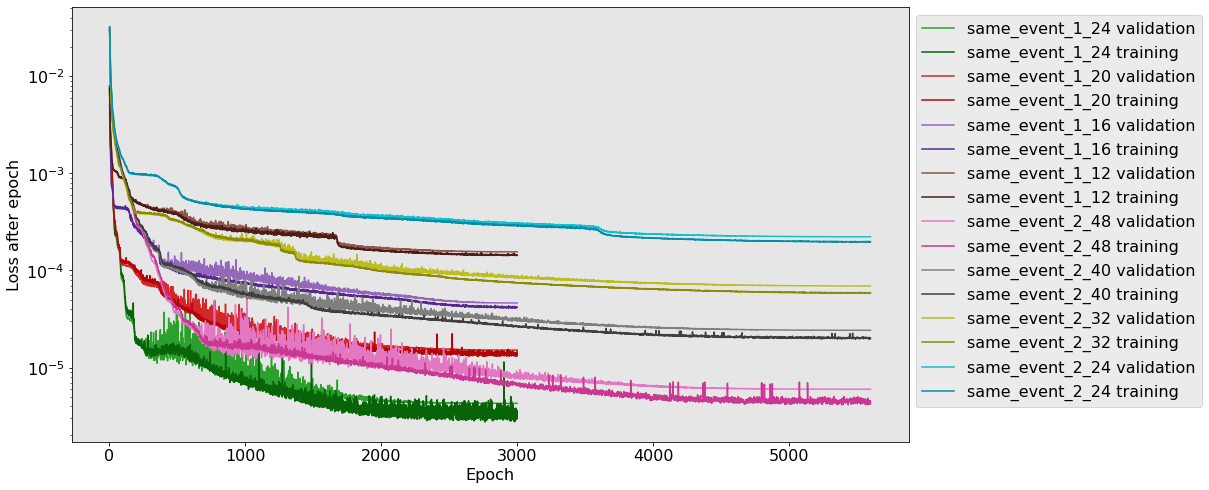

In [96]:
# visualize losses during training of a number of models

start_after = 3
show_every = 1
cmap = plt.get_cmap('tab10')
#color_list = [cmap.colors[i % len(cmap.colors)] for i in range(2*len(info))]
color_list = 2 * cmap.colors * (len(info) // len(cmap.colors) + 1)
color_list = color_list[2:]
second_color_list = [tuple([c**2 for c in color]) for color in color_list]
line_styles_base = ['-', ':' , '--', (0, (3, 5, 1, 5)), '-.', (0, (1, 5, 1, 5, 3, 5)), (0, (1, 3, 1, 3, 1, 3, 5, 3)), (0, (5, 1, 5, 1, 1, 1, 1, 1))]
line_styles = [line_styles_base[int(i / len(cmap.colors))] for i in range(len(info))]

fig = plt.figure(figsize=(15, 8))

#part_model_names = [model_name for model_name in model_names if info[model_name]['group_size'] in [3, 4] and info[model_name]['latent_space_size'] in [11]]
part_model_names = [model_name for model_name in model_names if info[model_name]['group_size'] in [1, 2] and info[model_name]['mode'] == 'same_event']

for i, model_name in enumerate(part_model_names):
    #if info[model_name]['group_size'] < 6 and info[model_name]['latent_space_size'] / info[model_name]['group_size'] == 24 and info[model_name]['mode'] == 'same_event':
    #if info[model_name]['group_size'] in [1, 2] and info[model_name]['mode'] == 'same_event':
    training_losses = [losses[model_name][j][0] for j in range(len(losses[model_name]))]
    testing_losses = [losses[model_name][j][1] for j in range(len(losses[model_name]))]

    plt.plot(range(start_after+1, len(losses[model_name])+1, show_every), testing_losses[start_after::show_every], label=info[model_name]['name'] + ' validation', linestyle='-', color=color_list[i])
    plt.plot(range(start_after+1, len(losses[model_name])+1, show_every), training_losses[start_after::show_every], label=info[model_name]['name'] + ' training', linestyle='-', color=second_color_list[i], alpha=1)
plt.legend(bbox_to_anchor=(1.36, 1), facecolor=(.9, .9, .9))
plt.xlabel('Epoch')
plt.ylabel('Loss after epoch')
#plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.yscale('log')
#plt.xscale('log')
plt.gca().set_facecolor((.9, .9, .9))

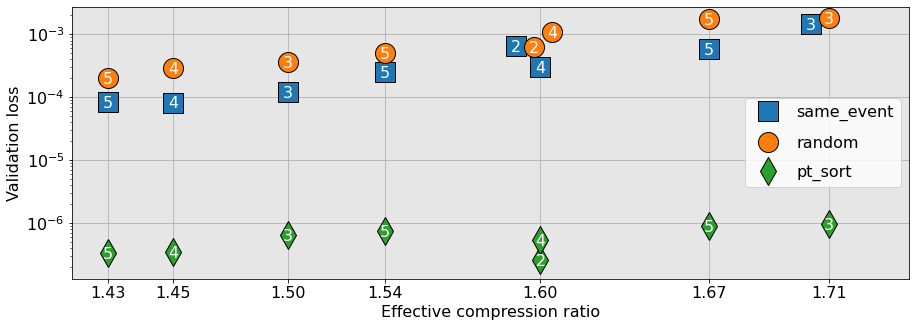

In [50]:
# view final losses of a number of models

modes = ['same_event', 'random', 'pt_sort']
#modes = ['pt_sort']
marker_base = ['s', 'o', 'd']
markers = dict(zip(modes, marker_base))
cmap = plt.get_cmap('tab10')
color_list = dict(zip(modes, [cmap.colors[i] for i in range(len(modes))]))

comp_ratios = {}
group_sizes = {}
end_losses = {}
axs = []

fig = plt.figure(figsize=(15, 5));
for j, mode in enumerate(modes):
    comp_ratios[mode] = []
    group_sizes[mode] = []
    end_losses[mode] = []

    #group_sizes = []
    latent_space_sizes = []

    for model_name in model_names:
        if info[model_name]['mode'] == mode:
            comp_ratio = (info[model_name]['n_features'] + info[model_name]['intermediate']) * info[model_name]['group_size'] / info[model_name]['latent_space_size']
            comp_ratios[mode].append(comp_ratio)
            group_sizes[mode].append(info[model_name]['group_size'])
            latent_space_sizes.append(info[model_name]['latent_space_size'])
            end_losses[mode].append(losses[model_name][-1][1])

x_ticks = np.unique([comp_ratios['same_event']])

offset = 0.0001
collision_limit = 0.5
min_distance = 0.007

tt = time.perf_counter()
adjusting = True
loop = 0
while adjusting:
    adjusting = False
    loop += 1
    delta_t = time.perf_counter() - tt
    if delta_t > 10:
        print('Time break after', loop, 'loops and', delta_t, 'seconds.')
        break

    for j, mode in enumerate(modes):
        those_modes = modes # modes[:j] + modes[j+1:]
        for k, that_mode in enumerate(those_modes):
            for c, comp_ratio in enumerate(comp_ratios[mode]):
                for t, that_comp_ratio in enumerate(comp_ratios[that_mode]):
                    if t == c and mode == that_mode:
                        continue
                    if np.abs(comp_ratio - that_comp_ratio) < min_distance:
                        max_loss = max(end_losses[mode][c], end_losses[that_mode][t])
                        min_loss = min(end_losses[mode][c], end_losses[that_mode][t])
                        if np.abs((max_loss - min_loss) / max_loss) < collision_limit:
                            this_group_size = group_sizes[mode][c]
                            that_group_size = group_sizes[that_mode][t]
                            modifier = 1
                            if this_group_size == that_group_size:
                                comp_ratios[mode][c] += (j - 1) * offset
                                comp_ratios[that_mode][t] += (k - 1) * offset
                                #print('Offsetting', mode, group_sizes[mode][c], comp_ratios[mode][c], 'because it collides with', that_mode, group_sizes[that_mode][t], comp_ratios[that_mode][t], '- offsetting.')
                                adjusting = True
                                continue
                            elif this_group_size > that_group_size:
                                modifier = -1
                            comp_ratios[mode][c] -= modifier * offset
                            comp_ratios[that_mode][t] += modifier * offset
                            #print('same')
                        #else:
                        #    comp_ratios[mode][c] += (j - 1) * offset
                        #    comp_ratios[that_mode][t] += (k - 1) * offset
                            #print('Offsetting', mode, group_sizes[mode][c], comp_ratios[mode][c], 'because it collides with', that_mode, group_sizes[that_mode][t], comp_ratios[that_mode][t], '- offsetting.')
                            adjusting = True

axs.append(plt.subplot(1, 1, 1))
for j, mode in enumerate(modes):
    plt.plot(comp_ratios[mode], end_losses[mode], linewidth=0, marker=markers[mode], label=mode, color=color_list[mode], markeredgewidth=1, markeredgecolor='k')
    plt.legend(loc='center right', labelspacing=0.9)

loss_max = 0
loss_min = np.inf
for end_loss in end_losses.values():
    loss_max = max(max(end_loss), loss_max)
    loss_min = min(min(end_loss), loss_min)
axs[0].set_ylabel('Validation loss')
for a, ax in enumerate(axs):
    ax.set_xlabel('Effective compression ratio')
    ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]*1.01]);
    ax.set_xticks(x_ticks);
    ax.set_ylim(loss_min*.5, loss_max*1.5)
    if a != 0:
        ax.tick_params(axis='y', which='both', left=False, labelleft=False)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.grid()
    ax.set_yscale('log')
    ax.set_facecolor((0.9, 0.9, 0.9))
    
for a, mode in enumerate(modes):
    for i in range(len(group_sizes[mode])):
        xscale = axs[0].get_xlim()[1] - axs[0].get_xlim()[0]
        yscale = axs[0].get_ylim()[1] - axs[0].get_ylim()[0]
        plot = axs[0].lines
        #axs[a].annotate(group_sizes[mode][i], (plot[0].get_data()[0][i]-0.011*xscale, plot[0].get_data()[1][i]-0.012*yscale), color='k') # Use with yscale linear
        #axs[0].annotate(group_sizes[mode][i], (plot[a].get_data()[0][i]*.9955, plot[a].get_data()[1][i]*.96), color='w') # Use with yscale 'log'
        axs[0].annotate(group_sizes[mode][i], (plot[a].get_data()[0][i]-0.0019, plot[a].get_data()[1][i]*.81), color='w') # Use with yscale 'log'

# Old normalization scheme comparison losses

In [23]:
# OLD

schemes = ['div_by_range', 'log', 'zero_one']
labels = ['DivByRange', 'Custom', 'MinMax Scaling']
labels = dict(zip(schemes, labels))

loss_path = r'F:\Master\Data\storage\collective-losses'

loss_filenames = ['run_20211026113204_d2lep_dim_4_same_event_1_3_losses',
                  'run_20211026114307_d2lep_dim_4_same_event_1_3_losses',
                  'run_20211026114315_d2lep_dim_4_same_event_1_3_losses']

batch_losses = {}
losses = {}

t = time.perf_counter()
for i, filename in enumerate(loss_filenames):
    print(filename)
    print(schemes[i])
    losses[schemes[i]] = pd.read_pickle(os.sep.join([loss_path, filename]))
print('Total run time:', time.perf_counter() - t, 'seconds.')

run_20211026113204_d2lep_dim_4_same_event_1_3_losses
div_by_range
run_20211026114307_d2lep_dim_4_same_event_1_3_losses
log
run_20211026114315_d2lep_dim_4_same_event_1_3_losses
zero_one
Total run time: 0.0036194999993313104 seconds.


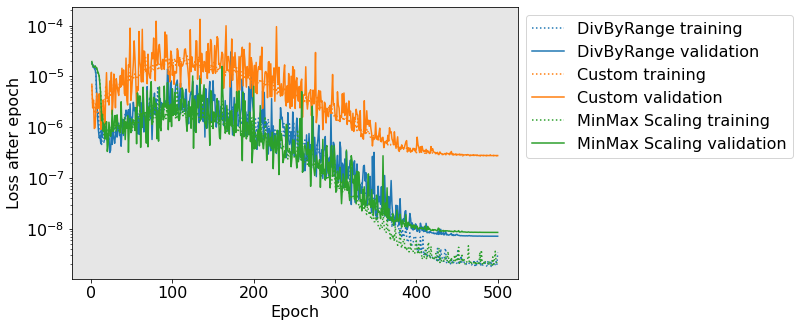

In [30]:
start_after = 0
cmap = plt.get_cmap('tab10')
colors = [cmap.colors[0], cmap.colors[1], cmap.colors[2]]

fig = plt.figure(figsize=(8, 5))
for i, scheme in enumerate(schemes):
    training_losses = [losses[scheme][j][0] for j in range(len(losses[scheme]))]
    testing_losses = [losses[scheme][j][1] for j in range(len(losses[scheme]))]
    plt.plot(range(start_after+1, len(losses[scheme])+1), training_losses[start_after:], label=labels[scheme] + ' training', linestyle=':', color=colors[i])
    plt.plot(range(start_after+1, len(losses[scheme])+1), testing_losses[start_after:], label=labels[scheme] + ' validation', color=colors[i])
    plt.legend(bbox_to_anchor=(1, 1))
    plt.xlabel('Epoch')
    plt.ylabel('Loss after epoch')
    #plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    plt.yscale('log')
    plt.gca().set_facecolor((.9, .9, .9))

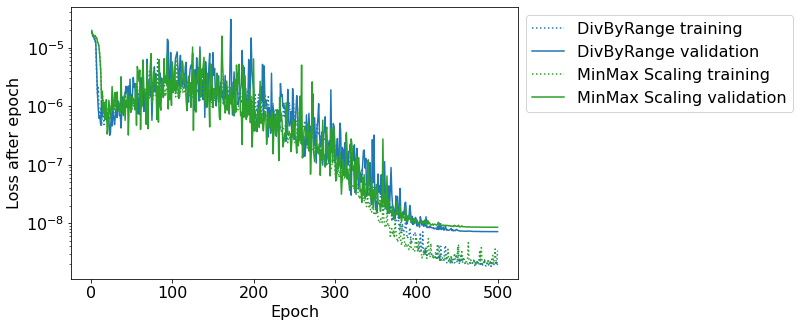

In [29]:
start_after = 0
cmap = plt.get_cmap('tab10')
colors = [cmap.colors[0], cmap.colors[1], cmap.colors[2]]

fig = plt.figure(figsize=(8, 5))
for i, scheme in enumerate(schemes[::2]):
    training_losses = [losses[scheme][j][0] for j in range(len(losses[scheme]))]
    testing_losses = [losses[scheme][j][1] for j in range(len(losses[scheme]))]
    plt.plot(range(start_after+1, len(losses[scheme])+1), training_losses[start_after:], label=labels[scheme] + ' training', linestyle=':', color=colors[2*i])
    plt.plot(range(start_after+1, len(losses[scheme])+1), testing_losses[start_after:], label=labels[scheme] + ' validation', color=colors[2*i])
    plt.legend(bbox_to_anchor=(1, 1))
    plt.xlabel('Epoch')
    plt.ylabel('Loss after epoch')
    #plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    plt.yscale('log')